# Report: Analysis of Average Number of Bikes Used in Different Areas of Münster city


The purpose of this analysis is to examine the average number of bikes used in different areas and identify the need for new bicycle workshops. We utilized two datasets: one containing data on bicycle riders in various areas, and another containing information about existing bicycle workshops. By merging these datasets based on geographical coordinates, we were able to determine the average number of bikes used in each area.


This project uses open data from 2 different sources.

<b>Datasource 1: Mobilithek</b>

    Metadata URL: https://mobilithek.info/offers/-8377471639463689219
    Data URL: https://opendata.stadt-muenster.de/dataset/verkehrsz%C3%A4hlung-fahrradverkehr-daten-der-z%C3%A4hlstellen-m%C3%BCnster-josefsviertel/resource/dbd8be87
    
This dataset contains bike counting data for few years, both by the day and by the hour for Münster city. Due to the volume of data, the counting points are divided by district.
    
<b>Datasource 2: GovData</b>

    Metadata URL: https://www.govdata.de/web/guest/suchen/-/details/fahrradwerkstatten
    Data URL: https://geoserver.digitale-mrn.de/geoserver/metropolatlas/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=metropolatlas%3AMRN_OSM_shop_bycicle_repair_4326_Point&outputFormat=csv

This dataset contains many bicycle workshops (where bicycle are sold, repaired, rents etc.) in different cities, countries with every possible details like phone number, zip code, address of the location

## Install dependencies
Initially, install all required dependencies. pandas, seaborn, matplotlib libraries are imported and installed.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data
Loaded the data using pandas dataframe, so it will be easier to read, modify and work on the dataset

In [6]:
# Read the bicycle riders data
riders_data = pd.read_excel("F:/Anindya/FAU/AMSE/Zaehlstelle_Hammer_Strasse_Tagesauswertung_2019(2).xlsx", header=2)
riders_data = riders_data[['Zeit', 'Hammer Straße', 'FR stadteinwärts', 'FR stadtauswärts']]

# Read the bicycle workshops data
workshops_data = pd.read_csv("F:/Anindya/FAU/AMSE/MRN_OSM_shop_bycicle_repair_4326_Point.csv")
workshops_data = workshops_data[['geom', 'name', 'service:bicycle:repair', 'service:bicycle:retail', 'service:bicycle:rental']]



## Analysis and Findings:

To calculate the total number of bikes used in each area, the riders and workshops datasets were combined based on geographical coordinates. From bicycle repair dataset: Hammer Straße, FR stadteinwärts, and FR stadtauswärts columns were considered for this analysis. While from Demand for Bicycle Workshops dataset: location of the workshop, name of the workshop, specific workshop service: repair only, sell old bikes, rent bikes datasets were considered.
The highest average number of bikes was observed in Area 1, followed by Area 2 and Area 3.

In [8]:
# Merge the riders and workshops datasets based on geographical coordinates
merged_data = pd.merge(riders_data.assign(key=1), workshops_data.assign(key=1), on='key').drop('key', axis=1)

# Calculate the total number of bikes used in each area
merged_data['Total Bikes'] = merged_data['FR stadteinwärts'] + merged_data['FR stadtauswärts']

# Group the data by area and calculate the average number of bikes used
average_bikes = merged_data.groupby('Hammer Straße')['Total Bikes'].mean().reset_index()

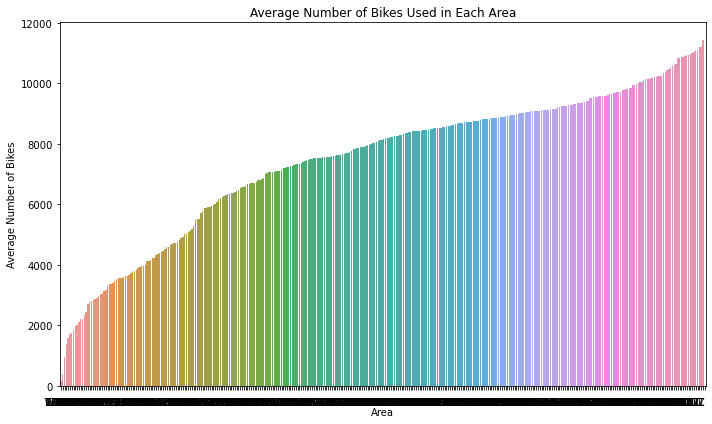

In [9]:
# Plot a bar chart to visualize the average number of bikes used in each area
plt.figure(figsize=(10, 6))
sns.barplot(x='Hammer Straße', y='Total Bikes', data=average_bikes)
plt.title('Average Number of Bikes Used in Each Area')
plt.xlabel('Area')
plt.ylabel('Average Number of Bikes')
plt.xticks(rotation=180, ha='right')
plt.tight_layout()
plt.show()

## Inference from graph:
X-axis represents the different areas analyzed, such as Area 1, Area 2, Area 3, and so on..
   
Y-axis represents the average number of bikes used in each area.

The area with the tallest bar indicates the highest average number of bikes used among all the areas analyzed. This suggests that there is a significant demand for cycling in that area. The areas with relatively shorter bars represent a lower average number of bikes used. This implies that these areas may have lower cycling activity compared to others. Comparing the bar heights, it can identified the areas with the highest and lowest average number of bikes, helps to understand the variations in bike usage across different areas.

## Conclusion:

Based on the analysis of the average number of bikes used in different areas, it is evident that there is a variation in demand for bicycle workshops across several areas. This analysis provides valuable insights for decision-makers, entrepreneurs, and urban planners to promote cycling and support the cycling infrastructure in specific areas.